# Machine Learning Engineer Nanodegree
## Capstone Project
## Project: Stock Price Predictor

The challenge of this project is to accurately predict the future closing value of a given stock across a given period of time in the future. For this project I will use a [Long Short Term Memory networks – usually just called “LSTMs”](http://colah.github.io/posts/2015-08-Understanding-LSTMs/) to predict the closing price of the [S&P 500](https://en.wikipedia.org/wiki/List_of_S%26P_500_companies) using a dataset of past prices


## Get the Data

In the following cells we download and save the [S&P 500 dataset](https://en.wikipedia.org/wiki/List_of_S%26P_500_companies).

   **Step 1 :** Define a function to get historical data from google finance

In [55]:
import pandas as pd
import datetime

# def get_historical_data(symbol,start_date,end_date):
#     ''' Daily quotes from Google. Date format='yyyy-mm-dd' '''
#     symbol = symbol.upper()
#     start = datetime.date(int(start_date[0:4]), int(start_date[5:7]), int(start_date[8:10]))
#     end = datetime.date(int(end_date[0:4]), int(end_date[5:7]), int(end_date[8:10]))
#     url_string = "http://www.google.com/finance/historical?q={0}".format(symbol)
#     url_string += "&startdate={0}&enddate={1}&num={0}&ei=KKltWZHCBNWPuQS9147YBw&output=csv".format(start.strftime('%b%d,%Y'), end.strftime('%b%d,%Y'),4000)
    
#     return url_string
    
#     col_names = ['Date','Open','High','Low','Close','Volume']
#     stocks = pd.read_csv(url_string, header=0, names=col_names) 
    
#     df = pd.DataFrame(stocks)
#     return df

def get_historical_data(symbol):
    ''' Daily quotes from Google. Date format='yyyy-mm-dd' '''
    symbol = symbol.upper()
    
#     start = datetime.date(int(start_date[0:4]), int(start_date[5:7]), int(start_date[8:10]))
#     end = datetime.date(int(end_date[0:4]), int(end_date[5:7]), int(end_date[8:10]))
    
#     url_string = "http://www.google.com/finance/historical?q={0}".format(symbol)
#     url_string += "&startdate={0}&enddate={1}&num={0}&ei=KKltWZHCBNWPuQS9147YBw&output=csv".format(start.strftime('%b%d,%Y'), end.strftime('%b%d,%Y'),4000)

    url_string = "https://eodhistoricaldata.com/api/eod/{0}".format(symbol)
    url_string += "?api_token=61cd292ed919f7.51702220&period=d"
    
    col_names = ['Date','Open','High','Low','Close','Volume']
    stocks = pd.read_csv(url_string, header=0, names=col_names) 
    
    df = pd.DataFrame(stocks)
    return df

 **Step 2:** get the data of desired firm from [Google Finance](http://www.google.com/finance).

In [56]:
# # data = get_historical_data('GOOGL','2005-01-01','2017-06-30') # from January 1, 2005 to June 30, 2017
# data = get_historical_data('NSEI.INDX') # from January 1, 2005 to June 30, 2017

# # print(data)
# data.head()

,Date,Open,High,Low,Close,Volume
2020-12-30,13980.90,13997.00,13864.95,13981.95,13981.95,380681000.0
2020-12-31,13970.00,14024.85,13936.45,13981.75,13981.75,452410000.0
2021-01-01,13996.10,14049.85,13991.35,14018.50,14018.50,258090905.0
2021-01-04,14104.35,14147.95,13953.75,14132.90,14132.90,494999295.0
2021-01-05,14075.15,14215.60,14048.15,14199.50,14199.50,492475349.0


**Step 3:** Write the data to a csv file.

In [142]:
# data.to_csv('nifty1.csv',index = False)

# Check Point #1

This is my first checkpoint. The data has been saved to disk.

## Preprocess the data

Now it is time to preprocess the data. In the following cells we will normalise it for better prediction of data.

**Step 1 :** Get the data from csv file.

In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('nifty1.csv')
# data = pd.read_csv('google.csv')
print(data.head())

print("\n")
print("Open   --- mean :", np.mean(data['Open']),  "  \t Std: ", np.std(data['Open']),  "  \t Max: ", np.max(data['Open']),  "  \t Min: ", np.min(data['Open']))
print("High   --- mean :", np.mean(data['High']),  "  \t Std: ", np.std(data['High']),  "  \t Max: ", np.max(data['High']),  "  \t Min: ", np.min(data['High']))
print("Low    --- mean :", np.mean(data['Low']),   "  \t Std: ", np.std(data['Low']),   "  \t Max: ", np.max(data['Low']),   "  \t Min: ", np.min(data['Low']))
print("Close  --- mean :", np.mean(data['Close']), "  \t Std: ", np.std(data['Close']), "  \t Max: ", np.max(data['Close']), "  \t Min: ", np.min(data['Close']))
print("Volume --- mean :", np.mean(data['Volume']),"  \t Std: ", np.std(data['Volume']),"  \t Max: ", np.max(data['Volume']),"  \t Min: ", np.min(data['Volume']))


        Date      Open      High       Low     Close     Volume
0  29-Dec-21  17220.10  17285.95  17176.65  17213.60  161679423
1  28-Dec-21  17177.60  17250.25  17161.15  17233.25  161679423
2  27-Dec-21  16937.75  17112.05  16833.20  17086.25  161679423
3  24-Dec-21  17149.50  17155.60  16909.60  17003.75  161679423
4  23-Dec-21  17066.80  17118.65  17015.55  17072.60  161679423


Open   --- mean : 7018.469261677549   	 Std:  3520.656820713961   	 Max:  18602.35   	 Min:  1903.1
High   --- mean : 7063.295215971873   	 Std:  3527.7786338591527   	 Max:  18604.45   	 Min:  1925.6
Low    --- mean : 6963.171659969866   	 Std:  3502.7819877495576   	 Max:  18445.3   	 Min:  1894.4
Close  --- mean : 7014.351833249623   	 Std:  3515.239564476135   	 Max:  18477.05   	 Min:  1902.5
Volume --- mean : 161679423.0   	 Std:  0.0   	 Max:  161679423   	 Min:  161679423


**Step 2 :** Remove Unncessary data, i.e., Date and High value

In [2]:
import preprocess_data as ppd
stocks = ppd.remove_data(data)

#Print the dataframe head and tail
print(stocks.head())
print("---")
print(stocks.tail())

   Item     Open   Close     Volume
0     0  2080.00  2115.0  161679423
1     1  2116.95  2103.7  161679423
2     2  2103.75  2032.2  161679423
3     3  2031.55  1998.3  161679423
4     4  1998.25  2015.5  161679423
---
      Item      Open     Close     Volume
3977  3977  17066.80  17072.60  161679423
3978  3978  17149.50  17003.75  161679423
3979  3979  16937.75  17086.25  161679423
3980  3980  17177.60  17233.25  161679423
3981  3981  17220.10  17213.60  161679423


**Step 2: ** Visualise raw data.

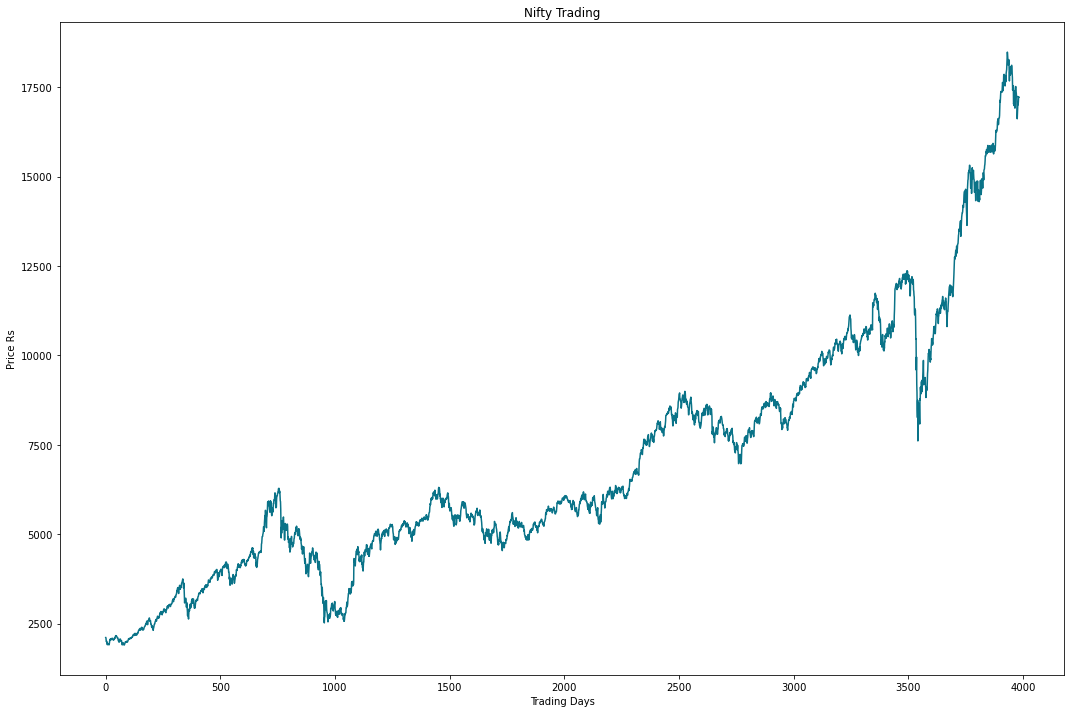

In [3]:
import visualize

visualize.plot_basic(stocks)

**Step 3 :** Normalise the data using minmaxscaler function

In [4]:
stocks = ppd.get_normalised_data(stocks)
print(stocks.head())

print("\n")
print("Open   --- mean :", np.mean(stocks['Open']),  "  \t Std: ", np.std(stocks['Open']),  "  \t Max: ", np.max(stocks['Open']),  "  \t Min: ", np.min(stocks['Open']))
print("Close  --- mean :", np.mean(stocks['Close']), "  \t Std: ", np.std(stocks['Close']), "  \t Max: ", np.max(stocks['Close']), "  \t Min: ", np.min(stocks['Close']))
print("Volume --- mean :", np.mean(stocks['Volume']),"  \t Std: ", np.std(stocks['Volume']),"  \t Max: ", np.max(stocks['Volume']),"  \t Min: ", np.min(stocks['Volume']))

   Item      Open     Close  Volume
0     0  0.010593  0.012821     0.0
1     1  0.012806  0.012139     0.0
2     2  0.012016  0.007825     0.0
3     3  0.007692  0.005780     0.0
4     4  0.005698  0.006818     0.0


Open   --- mean : 0.30632329366154465   	 Std:  0.21082724198475744   	 Max:  0.9999999999999999   	 Min:  0.0
Close  --- mean : 0.3084157236998666   	 Std:  0.21208657637619935   	 Max:  0.9999999999999999   	 Min:  0.0
Volume --- mean : 0.0   	 Std:  0.0   	 Max:  0.0   	 Min:  0.0


**Step 4 :** Visualize the data again

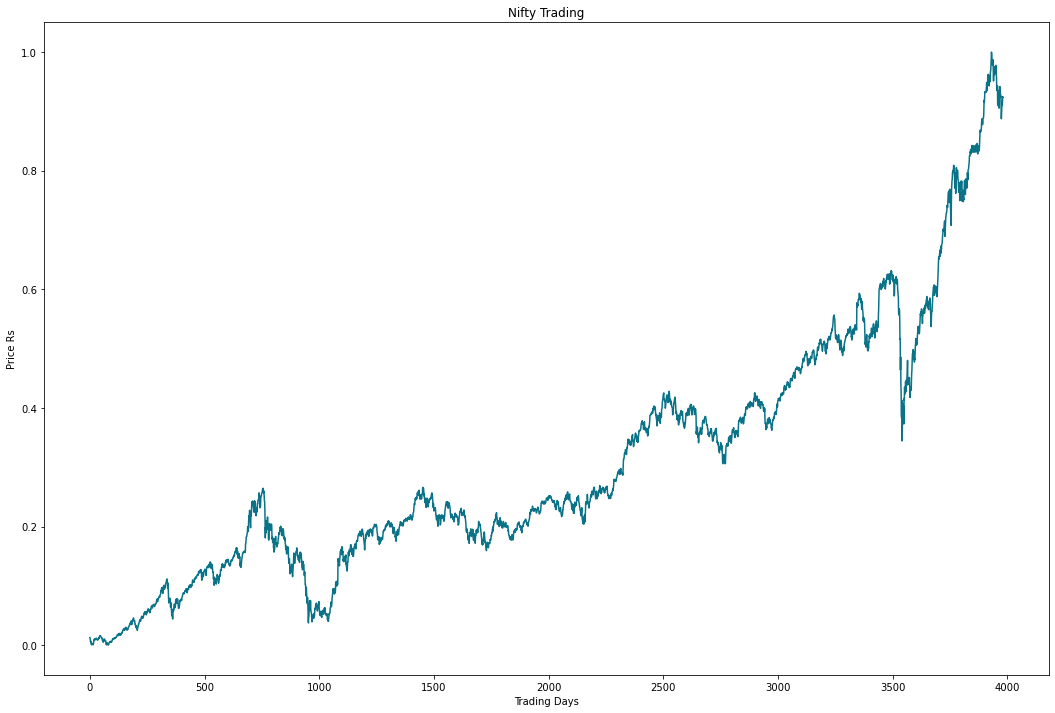

In [5]:
visualize.plot_basic(stocks)

**Step 5:** Log the normalised data for future resuablilty

In [6]:
stocks.to_csv('nifty_preprocessed.csv',index= False)

# Check Point #2

This is my second checkpoint. The preprocessed data has been saved to disk.

## Bench Mark Model

In this section we will check our bench mark model. As is proposed in my proposal my bench mark model is a simple linear regressor model. 

**Step 1:** Load the preprocessed data

In [7]:
import math
import pandas as pd
import numpy as np
from IPython.display import display
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit

import visualize as vs
import stock_data as sd
import LinearRegressionModel

stocks = pd.read_csv('nifty_preprocessed.csv')
display(stocks.head())

,Item,Open,Close,Volume
0,0,0.010593,0.012821,0.0
1,1,0.012806,0.012139,0.0
2,2,0.012016,0.007825,0.0
3,3,0.007692,0.005780,0.0
4,4,0.005698,0.006818,0.0


**Step 2:** Split data into train and test pair

In [8]:
X_train, X_test, y_train, y_test, label_range= sd.train_test_split_linear_regression(stocks)

print("x_train", X_train.shape)
print("y_train", y_train.shape)
print("x_test", X_test.shape)
print("y_test", y_test.shape)

x_train (2728, 1)
y_train (2728, 1)
x_test (1254, 1)
y_test (1254, 1)


**Step 3:** Train a Linear regressor model on training set and get prediction

In [9]:
model = LinearRegressionModel.build_model(X_train,y_train)

**Step 4:** Get prediction on test set

In [10]:
predictions = LinearRegressionModel.predict_prices(model,X_test, label_range)

**Step 5:** Plot the predicted values against actual

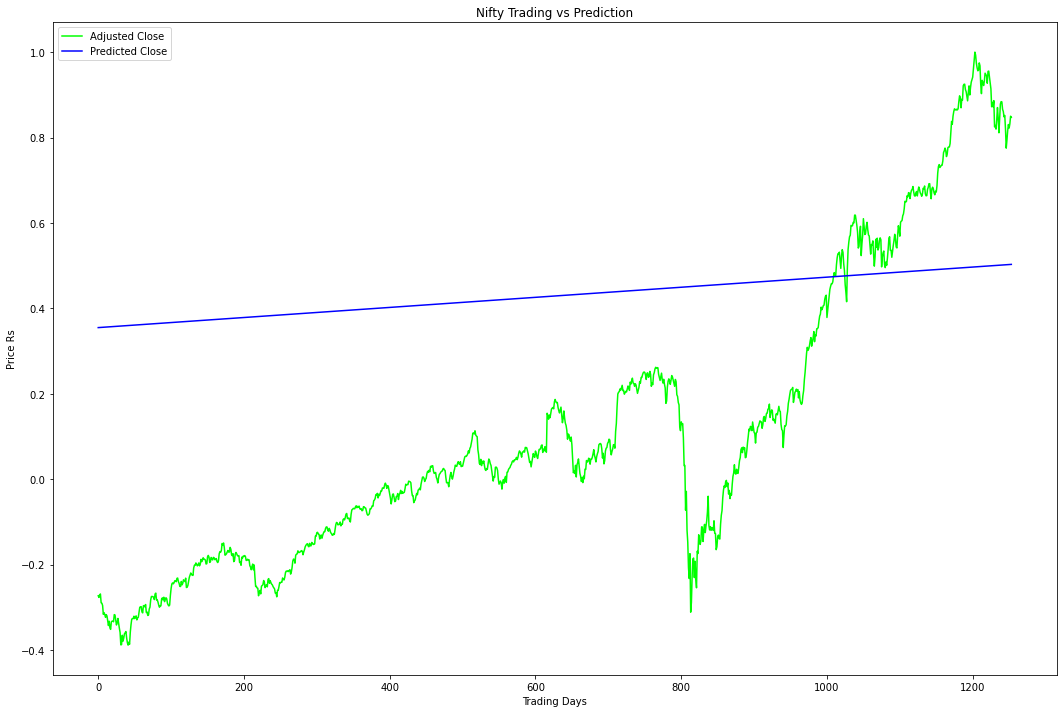

In [11]:
vs.plot_prediction(y_test,predictions)

**Step 6:** measure accuracy of the prediction

In [12]:
trainScore = mean_squared_error(X_train, y_train)
print('Train Score: %.4f MSE (%.4f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = mean_squared_error(predictions, y_test)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.1406 MSE (0.3750 RMSE)
Test Score: 0.18964717 MSE (0.43548499 RMSE)


# Checkpoint #3


## Long-Sort Term Memory Model

In this section we will use LSTM to train and test on our data set.

### Basic LSTM Model

First lets make a basic LSTM model.

**Step 1 :** import keras libraries for smooth implementaion of lstm 

In [13]:
import math
import pandas as pd
import numpy as np
from IPython.display import display
# import keras

from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from keras.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold

import lstm, time #helper libraries

import visualize as vs
# import stock_data as sd
import LinearRegressionModel

stocks = pd.read_csv('nifty_preprocessed.csv')
stocks_data = stocks.drop(['Item'], axis =1)

display(stocks_data.head())

Using TensorFlow backend.


,Open,Close,Volume
0,0.010593,0.012821,0.0
1,0.012806,0.012139,0.0
2,0.012016,0.007825,0.0
3,0.007692,0.005780,0.0
4,0.005698,0.006818,0.0


**Step 2 :** Split train and test data sets and Unroll train and test data for lstm model

In [14]:
import stock_data as sd
# bala: third column size of buffer
X_train, X_test,y_train, y_test = sd.train_test_split_lstm(stocks_data, 5)
# X_train, X_test,y_train, y_test = sd.train_test_split_lstm(stocks_data, 5,110)

unroll_length = 50
X_train = sd.unroll(X_train, unroll_length)
X_test = sd.unroll(X_test, unroll_length)
y_train = y_train[-X_train.shape[0]:]
y_test = y_test[-X_test.shape[0]:]

print("x_train", X_train.shape)
print("y_train", y_train.shape)
print("x_test", X_test.shape)
print("y_test", y_test.shape)


x_train (3426, 50, 3)
y_train (3426,)
x_test (446, 50, 3)
y_test (446,)


**Step 3 :** Build a basic Long-Short Term Memory model

In [15]:
# build basic lstm model
model = lstm.build_basic_model(input_dim = X_train.shape[-1],output_dim = unroll_length, return_sequences=True)

# Compile the model
start = time.time()
model.compile(loss='mean_squared_error', optimizer='adam')
print('compilation time : ', time.time() - start)

compilation time :  0.009501934051513672


**Step 4:** Train the model

In [16]:
model.fit(
    X_train,
    y_train,
    epochs=1,
    validation_split=0.05)

Train on 3254 samples, validate on 172 samples
Epoch 1/1
3254/3254 [==============================] - 26s 8ms/step - loss: 0.0023 - val_loss: 7.8852e-04


**Step 5:** make prediction using test data

In [17]:
predictions = model.predict(X_test)

**Step 6:** Plot the results

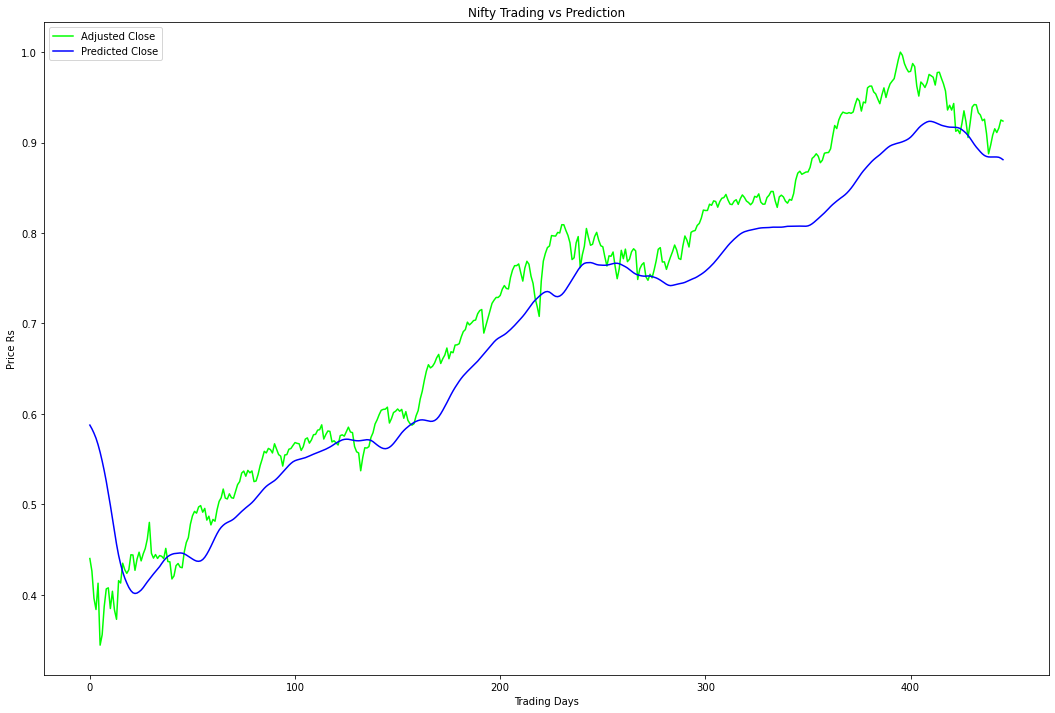

In [18]:
vs.plot_lstm_prediction(y_test,predictions)

** Step 7:** Get the test score.

In [19]:
trainScore = model.evaluate(X_train, y_train, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = model.evaluate(X_test, y_test, verbose=0)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.00024109 MSE (0.01552691 RMSE)
Test Score: 0.00255895 MSE (0.05058608 RMSE)


### Improved LSTM Model

**Step 1: ** Build an improved LSTM model

In [20]:
# Set up hyperparameters
batch_size = 100
epochs = 5

# build improved lstm model
model = lstm.build_improved_model( X_train.shape[-1],output_dim = unroll_length, return_sequences=True)

start = time.time()
#final_model.compile(loss='mean_squared_error', optimizer='adam')
model.compile(loss='mean_squared_error', optimizer='adam')
print('compilation time : ', time.time() - start)

compilation time :  0.007939815521240234


**Step 2: ** Train improved LSTM model

In [21]:
model.fit(X_train, 
          y_train, 
          batch_size=batch_size,
          epochs=epochs,
          verbose=2,
          validation_split=0.05
         )

Train on 3254 samples, validate on 172 samples
Epoch 1/5
 - 16s - loss: 0.0067 - val_loss: 0.0039
Epoch 2/5
 - 14s - loss: 6.7344e-04 - val_loss: 7.4634e-04
Epoch 3/5
 - 14s - loss: 5.4484e-04 - val_loss: 7.8861e-04
Epoch 4/5
 - 15s - loss: 5.4328e-04 - val_loss: 6.5895e-04
Epoch 5/5
 - 15s - loss: 5.0610e-04 - val_loss: 7.0491e-04


**Step 3:** Make prediction on improved LSTM model

In [22]:
# Generate predictions 
predictions = model.predict(X_test, batch_size=batch_size)

**Step 4:** plot the results

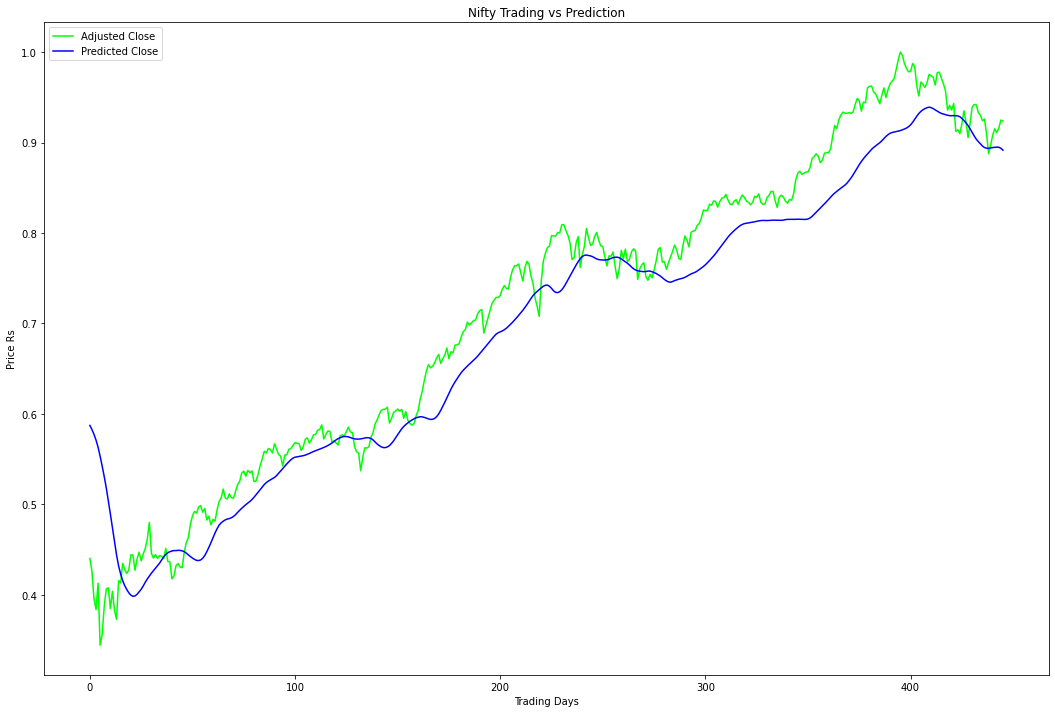

In [23]:
vs.plot_lstm_prediction(y_test,predictions)

**Step 5:** Get the test score

In [24]:
trainScore = model.evaluate(X_train, y_train, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = model.evaluate(X_test, y_test, verbose=0)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.00022573 MSE (0.01502421 RMSE)
Test Score: 0.00203605 MSE (0.04512259 RMSE)


In [25]:
range = [np.amin(stocks_data['Close']), np.amax(stocks_data['Close'])]

#Calculate the stock price delta in $

true_delta = testScore*(range[1]-range[0])
print('Delta Price: %.6f - RMSE * Adjusted Close Range' % true_delta)    

Delta Price: 0.002036 - RMSE * Adjusted Close Range


# Checking Robustness of the model

In this section we will check robustness of our LSTM model. I have used new unseen datasets for this from July 1, 2017 to July 20,2017. I have downloaded the data sets from google finance website to check for robustness of the model.

In [26]:
import preprocess_data as ppd

data = pd.read_csv('nifty.csv')

stocks = ppd.remove_data(data)

stocks = ppd.get_normalised_data(stocks)

stocks = stocks.drop(['Item'], axis = 1)
#Print the dataframe head and tail
print(stocks.head())

X = stocks[:].to_numpy()
Y = stocks[:]['Close'].to_numpy()

X = sd.unroll(X,1)
Y = Y[-X.shape[0]:]

print(X.shape)
print(Y.shape)

# Generate predictions 
predictions = model.predict(X)

#get the test score
testScore = model.evaluate(X, Y, verbose=0)
print('Test Score: %.4f MSE (%.4f RMSE)' % (testScore, math.sqrt(testScore)))

       Open     Close    Volume
0  0.045894  0.071730  0.314811
1  0.043644  0.071689  0.382792
2  0.049032  0.079278  0.198626
3  0.071381  0.102902  0.423156
4  0.065352  0.116656  0.420764
(247, 1, 3)
(247,)
Test Score: 0.2626 MSE (0.5125 RMSE)
